# Darcy equation

In this tutorial we present how to solve a Darcy equation with [PyGeoN](https://github.com/compgeo-mox/pygeon) in themoving domain case (the upper boundary will move).  The unkwons are the velocity $u$, the elevation head $h$ and the height of the upper boundary $\eta$.

Let $\Omega=(0,1)\times(0,\eta)$ with boundary $\partial \Omega$ and outward unit normal ${\nu}$. Given 
$K$ the matrix permeability, we want to solve the following problem: find $(\bm{u}, h)$ such that
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
K^{-1} {\bm{u}} + \nabla h = {0}\\
S_s \frac{\partial{h}}{\partial t} + \nabla \cdot {u} = f
\end{array}
&\text{in } \Omega
\end{array}
\right.
$$

In order to solve the problem, we will perfom a change of coordinates to a reference domain $\hat{\Omega}=(0,1)^2$ through the (linear) trasnformation $R : \Omega \rightarrow \hat{\Omega}$ (and its inverse function $D : \hat{\Omega} \rightarrow \Omega$).
Recall that $\hat{\nabla}R=(\nabla D)^{-1}$.

Let $\hat{h}$ and $\hat{\bm{u}}$ be $h$ and $\bm{u}$ respectevely in the reference domain and let $\hat{K}$ be the transformed permeability matrix, defined as $\hat{K}=det(\hat{\nabla}D) (\hat{\nabla} D)^{-1} K (\hat{\nabla} D)^{-T}$.

The equation describing the motion of $\partial_{top}\Omega$ is:
$$

\phi \frac{\partial \eta}{\partial t} = \hat{u_3} + I(t)

$$

The transformed equations in $\hat{\Omega}$ is:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\hat{K}({\eta})^{-1} {\hat{u}} + \hat{\nabla} \hat{h} = {0}\\
\hat{S}_s \frac{\partial{\hat{h}}}{\partial t} + \hat{\nabla} \cdot {\hat{\bm{u}}} = f
\end{array}
&\text{in } \hat{\Omega}
\end{array}
\right.
$$
with boundary conditions:
$$ \hat{h} = \eta \text{ on } \Gamma \qquad \hat{h} = \ell \text{ on } \Gamma_D \qquad \hat{\bm{\nu}} \cdot \hat{\bm{u}} = 0 \text{ on } \Gamma_N$$

The weak formulation will be:
$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta)^{-1} {\bm{\hat{u}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s \frac{\partial{\hat{h}}}{\partial t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}} v \, d\Omega = \int_{\Omega} fv \, d\Omega\\
\int_{\Gamma} \phi \frac{\partial \eta}{\partial t} v \, d\sigma = \int_{\Gamma} \hat{u_3} v \, d\sigma + \int_{\Gamma} I(t) v \, d\sigma
\end{array}
\end{array}
\right.
$$

For the time discretization, we will employ a backward Euler scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1})^{-1} {\bm{\hat{u}}^{n+1}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega = - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega - \int_{\Gamma} \eta^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\int_{\Omega} \hat{S}_s^{n+1} \frac{\hat{h}^{n+1} - \hat{h}^{n}}{\Delta t} v \, d\Omega + \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}} v \, d\Omega = \int_{\Omega} f^{n+1}v \, d\Omega\\
\int_{\Gamma} \phi \eta^{n+1} v \, d\sigma = \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

To deal with the non-linear term, we will employ a simple Picard scheme:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
\int_{\Omega}\hat{K}(\eta^{n+1}_k)^{-1} {\bm{\hat{u}_{k+1}^{n+1}}} \cdot \bm{v} \, d\Omega - \int_{\Omega} h^{n+1}_{k+1} \hat{\nabla} \cdot {\hat{\bm{v}}} \, d\Omega + \int_{\Gamma} \eta^{n+1}_{k+1} \bm{v} \cdot \bm{\nu} \, d\Omega= - \int_{\Gamma_D} h^{n+1} \bm{v} \cdot \bm{\nu} \, d\Omega\\
\Delta t \int_{\Omega} \hat{\nabla} \cdot {\hat{\bm{u}}^{n+1}_{k+1}} v \, d\Omega + \int_{\Omega} \hat{S}_s \hat{h}^{n+1}_{k+1} v \, d\Omega = \int_{\Omega} \hat{S}_s \hat{h}^{n} v \, d\Omega + \Delta t \int_{\Omega} f^{n+1}v \, d\Omega\\
- \Delta t \int_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} \cdot \bm{\nu} v \, d\sigma + \int_{\Gamma} \phi \eta^{n+1}_{k+1} v \, d\sigma = \int_{\Gamma} \phi \eta^{n} v \, d\sigma + \Delta t \int_{\Gamma} I^{n+1} v \, d\sigma
\end{array}
\end{array}
\right.
$$

The matrix formulation will be:

$$
\left\{
\begin{array}{ll}
\begin{array}{l} 
M_u(\bm{\eta}^{n+1}_{k}) \bm{u}^{n+1}_{k+1} + B^T\bm{h}^{n+1}_{k+1} + B_{\Gamma}^T \bm{\eta}^{n+1}_{k+1}= \bm{BC}^{n+1}\\
- \Delta t B \hat{\bm{u}}^{n+1}_{k+1} + S_s M_{h} \bm{\hat{h}^{n+1}_{k+1}} = \Delta t \bm{F}^{n+1} + S_s M_{h} \bm{\hat{h}^{n}}\\
- \Delta t B_{\Gamma} \hat{\bm{u}}^{n+1}_{k+1} + \phi M_{\Gamma} \bm{\eta^{n+1}_{k+1}} = \phi M_{\Gamma} \bm{\eta^{n}} + \Delta t \bm{I}^{n+1}
\end{array}
\end{array}
\right.
$$

$$
\left(
\begin{array}{cc} 
M_u(\bm{\eta^{n+1}_k}) & B^T & B_{\Gamma}^T\\
-\Delta t B & S_s M_h & 0\\
-\Delta t B_{\Gamma} & 0 & \phi M_{\Gamma}
\end{array}
\right)
\left(
\begin{array}{c} 
\bm{u^{n+1}_{k+1}}\\ 
\bm{h^{n+1}_{k+1}}\\
\bm{\eta^{n+1}_{k+1}}
\end{array}
\right)
=\left(
\begin{array}{c} 
\bm{BC}^{n+1}\\ 
\Delta t \bm{F}^{n+1} + S_s M_h \bm{h}^n\\
\phi M_{\Gamma} \bm{\eta}^n + \Delta t \bm{I}^{n+1}
\end{array}
\right)
$$

We will start to test the method in the case $M_u(\bm{h_k}^{n+1})=\bm{I}$

In [1]:
%load_ext Cython

In [2]:
import numpy as np
import scipy.sparse as sps
from math import ceil, floor, log10, exp, isnan
import os, shutil

import porepy as pp
import pygeon as pg
import scipy.integrate as integrate

import matplotlib.pyplot as plt

import scipy as sc

/opt/conda/lib/python3.11/site-packages/porepy/numerics/nonlinear/nonlinear_solvers.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


In [3]:
output_directory = 'output_std'

### Parameters

In [4]:
dt = 0.1
T = 1
S_s = 0.1
phi = 0.1

stab = 0

N = 10 # 16
quad_order = 2


infiltration_rate = 1e-3
extraction_rate = 0.3 # Negative -> out, Positive -> In

In [5]:
abs_tol = 1e-5
rel_tol = 1e-5
max_iterations_per_step = 100

### Mesh and discretization

In [6]:
# convert the grid into a mixed-dimensional grid
sd = pp.StructuredTriangleGrid([N, N], [1, 1])
sd.compute_geometry()

mdg = pg.as_mdg(sd)
pg.convert_from_pp(mdg)

In [7]:
boundary_grid, boundary_face_map, boundary_node_map = pp.partition.extract_subgrid(sd, sd.face_centers[1, :] == 1, faces=True)

In [8]:
subdomain, data = mdg.subdomains(return_data=True)[0]

In [9]:
key = "flow"

darcy_data = {}
richards_data = {}

bc_val = []
bc_ess_flag = []
initial_pressure = []

In [10]:
q_field     = pg.RT0(key)
gamma_field = pg.Lagrange1(key)
h_field     = pg.PwConstants(key)

In [11]:
dof_q   = q_field.ndof( subdomain )
dof_p   = h_field.ndof( subdomain )
dof_eta = gamma_field.ndof( boundary_grid )

/opt/conda/lib/python3.11/site-packages/porepy/viz/plot_grid.py:197: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  ax.set_zlim3d(z)


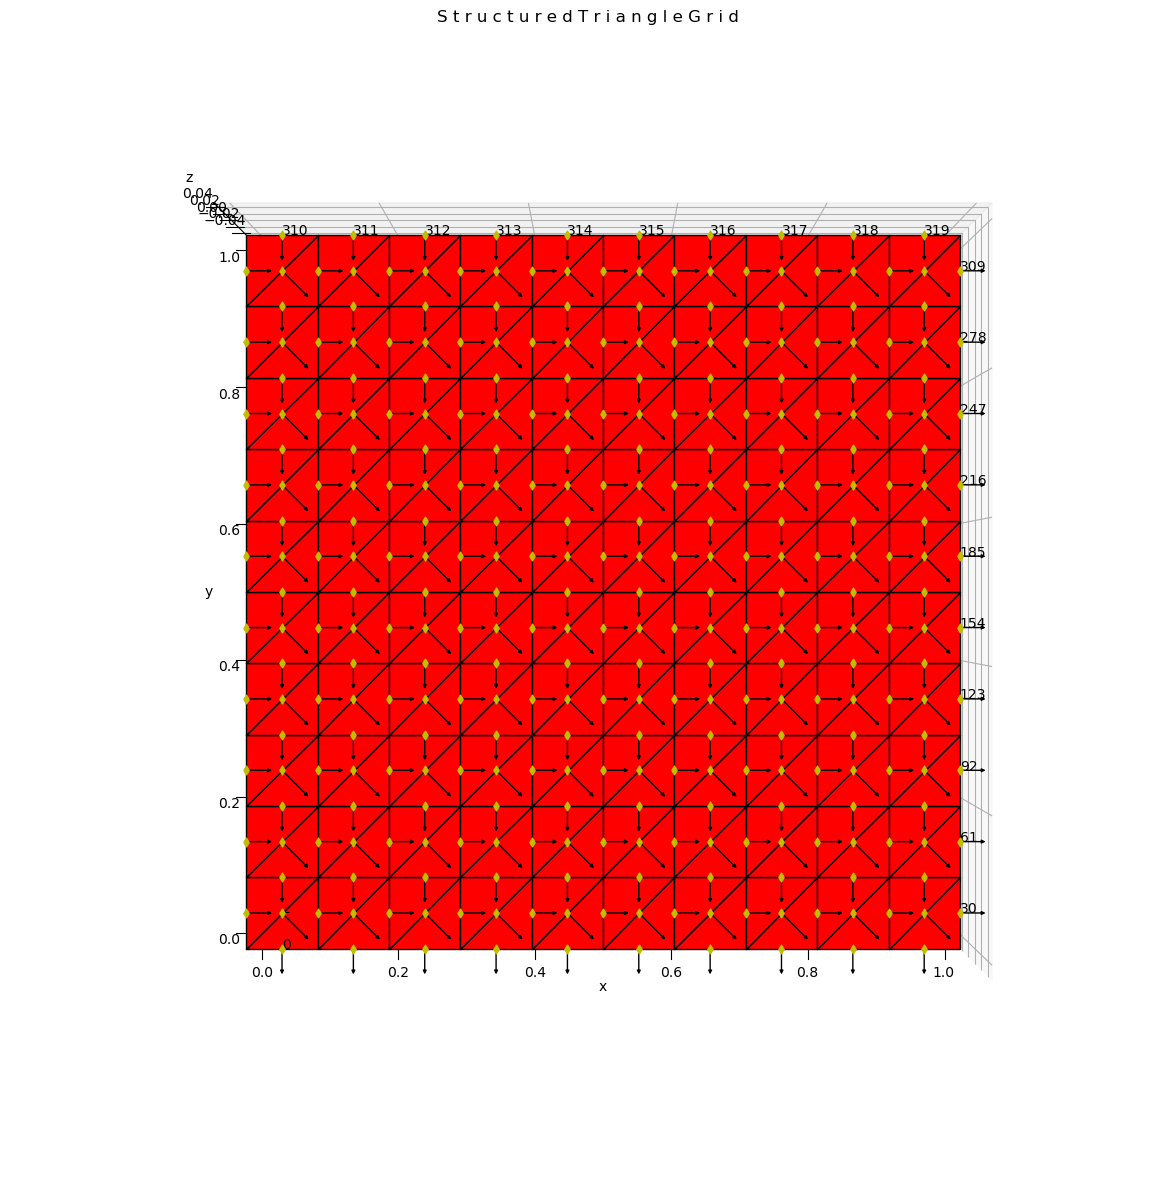

In [12]:
pp.plot_grid(
    subdomain,
    plot_2D=True,
    info='of',
    fig_size=(15,15)
)

### BCs

In [13]:
def assemble_bc_ess_val(t: float):
    data = []
    row = []
    col = []

    if t <= 1:

        face_ids = np.where(sd.face_centers[0, :] == 0)[0]

        for face_id in face_ids:
            row.append(face_id)
            col.append(0)

            data.append( np.inner(np.array([extraction_rate, 0, 0]), sd.face_normals.T[face_id, :]) )

    return sps.coo_array( (data, (row, col)), shape=(dof_q + dof_p + dof_eta, 1) ).todense().flatten()

In [14]:
# Usual BC (no slip on the left and right, fixed unitary head on the bottom. No condition on the top boundary)
left = sd.face_centers[0, :] == 0
right = sd.face_centers[0, :] == 1

bottom = sd.face_centers[1, :] == 0


def h_bc(x, t): return 1
def initial_h_func(x): return 1
def infiltration(x, t): return infiltration_rate

bc_val = lambda t: -q_field.assemble_nat_bc(sd, lambda x: h_bc(x,t), right)
bc_ess_flag = lambda t: np.hstack((left, np.zeros(h_field.ndof(sd), dtype=bool), np.zeros(boundary_grid.num_nodes, dtype=bool)))
bc_ess_val  = assemble_bc_ess_val

### Matrix assembly

In [15]:
def assemble_B_gamma():
    data = []
    row = []
    col = []

    face, _, sign = sps.find(subdomain.cell_faces)

    # Look for the boundary faces ids
    index_up_face = np.where(sd.face_centers[1, :] == 1)[0]

    # Loop thorough the boundary faces
    for i in range( boundary_grid.num_cells ):
        s = sign[ np.where(face == index_up_face[i]) ][0]

        # (1-s)-element
        col.append(index_up_face[i])
        row.append(i)
        data.append( s / 2 )

        # s-element
        col.append(index_up_face[i])
        row.append(i+1)
        data.append( s / 2 )
    
    return sps.coo_matrix( (data, (row, col)), shape=(N+1, sd.num_faces) )

In [16]:
eta_diff = gamma_field.assemble_diff_matrix(boundary_grid)
eta_diff[0,0] = -1
eta_diff *= N

In [17]:
B_gamma = assemble_B_gamma()
M_gamma = gamma_field.assemble_mass_matrix( boundary_grid )

M_h = h_field.assemble_mass_matrix( subdomain )

$$
\left(
\begin{array}{cc} 
M_u(\bm{\eta_k^{n+1}}) & B^T & B_{\Gamma}^T\\
-\Delta t B & S_s M_h & 0\\
-\Delta t B_{\Gamma} & 0 & \phi M_{\Gamma}
\end{array}
\right)
\left(
\begin{array}{c} 
\bm{u^{n+1}_{k+1}}\\ 
\bm{h^{n+1}_{k+1}}\\
\bm{\eta^{n+1}_{k+1}}
\end{array}
\right)
=\left(
\begin{array}{c} 
\bm{BC}^{n+1}\\ 
\Delta t \bm{F}^{n+1} + S_s M_h \bm{h}^n\\
\phi M_{\Gamma} \bm{\eta}^n + \Delta t \bm{I}^{n+1}
\end{array}
\right)
$$

In [18]:
# B matrix
B = - pg.cell_mass(mdg, h_field) @ pg.div(mdg)

B.shape, B_gamma.shape

((200, 320), (11, 320))

In [19]:
def vertical_projection_matrix():
    data = []
    row = []
    col = []

    for c in range(subdomain.num_cells):
        x_center = subdomain.cell_centers[:, c]
        id = np.max(np.where( boundary_grid.nodes[0, :] < x_center[0] ))

        data.append(1)
        row.append(c)
        col.append(id)

    return sps.coo_matrix( (data, (row, col)), shape=(subdomain.num_cells, boundary_grid.num_cells) )

In [20]:
cell_proj_eta = vertical_projection_matrix()

# Helper function to save the given solution to a VTU file
def save_step(sol, proj_q, proj_psi, proj_eta, saver, i):
    ins = list()

    ins.append((sd, "cell_q", ( proj_q @ sol[:dof_q] ).reshape((3, -1), order="F")))
    ins.append((sd, "cell_h", proj_psi @ sol[dof_q:(dof_q+dof_p)]))
    ins.append((sd, "cell_eta", cell_proj_eta @ proj_eta @ sol[-dof_eta:]))

    saver.write_vtu(ins, time_step=i)

In [21]:
%%cython
import numpy as np

def find_ordering(coord: np.array):
    lx = np.argmin(coord[0, :])
    rx = np.argmax(coord[0, :])
    mx = np.setdiff1d(np.array([0,1,2]), np.array([lx, rx]))[0]

    # Vertical Alignment
    if np.abs( coord[0, lx] - coord[0, mx] ) < 1e-7:
        # lx and mx vertical aligned, rx no
        up =   lx if np.argmax(coord[1, np.array([lx, mx])]) == 0 else mx
        down = lx if np.argmin(coord[1, np.array([lx, mx])]) == 0 else mx

        if np.abs( coord[1, up] - coord[1, rx] ) < 1e-7:
            return [up, down, rx]
        else:
            return [down, rx, up]
    else:
        # rx and mx vertical aligned, lx no
        up =   rx if np.argmax(coord[1, np.array([rx, mx])]) == 0 else mx
        down = rx if np.argmin(coord[1, np.array([rx, mx])]) == 0 else mx

        if np.abs( coord[1, up] - coord[1, lx] ) < 1e-7:
            return [up, lx, down]
        else:
            return [down, up, lx]

In [22]:
%%cython
import numpy as np

def K_func_eval(base_height: float, base_width: float, element_height: float, element_width: float, m: int, ls_eta: float, rs_eta: float, grad_eta: float, x, y):
    coord = lambda t: ((m+1) * (1-t) - (m-1) * t) / 2

    x_real = base_width + (1 - coord(y)) * element_width
    y_real = base_height + coord(x) * element_height

    chi_x3  = (1-coord(y)) * ls_eta + coord(y) * rs_eta
    chi_eta = y_real
    
    return np.array([[( 1 + np.power(chi_eta * grad_eta, 2) ) / chi_x3, chi_eta * grad_eta],
                     [                              chi_eta * grad_eta,             chi_x3]])


    #Compete:
    #return np.array([[( K22_eval + chi_eta * grad_eta * ( chi_eta * grad_eta * K11_eval - K12_eval - K21_eval ) ) / chi_x3, chi_eta * grad_eta * K11_eval - K12_eval],
    #                 [                                                            chi_eta * grad_eta * K11_eval - K21_eval,                        chi_x3 * K11_eval]]) / ( K11_eval * K22_eval - K12_eval * K21_eval )

In [23]:
def local_q(coord, sign, ls_eta, rs_eta, grad_eta):
    M = np.zeros(shape=(3,3))

    ordering = find_ordering(coord)
    orientation = sign[ordering] #[-1, 1, -1] * sign[ordering]

    base_height = np.min(coord[1,:])
    base_width  = np.min(coord[0, :])

    element_height = (np.max(coord[1, :]) - np.min(coord[1, :]))
    element_width  = (np.max(coord[0, :]) - np.min(coord[0, :]))

    K_inv_local = lambda x,y: K_func_eval(base_height, base_width, 
                     element_height, element_width, 
                     np.prod(sign), 
                     ls_eta, rs_eta, grad_eta, x, y)

    diff = coord[:, ordering]

    diff[0, :] -= diff[0,0]
    diff[1, :] -= diff[1,0]

    base = lambda x,y,i: diff[:,1] * x + diff[:,2] * y - diff[:,i]

    qs = [ (lambda x,y: base(x,y,0)), (lambda x,y: base(x,y,1)), (lambda x,y: base(x,y,2)) ]

    for i in range(3):
        for j in range(3):
            integrand = lambda ys, x: np.array( [ qs[i](x,y).T @ K_inv_local(x,y) @ qs[j](x,y) for y in np.array(ys)]  )
            inside = lambda xs, n: np.array([integrate.fixed_quad(integrand, 0, 1-x, args=(x,), n=n)[0] for x in np.array(xs)])
            M[ordering[i], ordering[j]] = orientation[j] * orientation[i] / ( element_height * element_width ) * integrate.fixed_quad(inside, 0, 1, n=3, args=(3,))[0]

    return M

In [24]:
def mass_q(eta_dofs):

    # Gradient of eta and pointwise value
    grad_eta   = eta_diff @ eta_dofs

    faces, _, sign = sps.find(subdomain.cell_faces)


    _, _, _, _, _, node_coords = pp.map_geometry.map_grid(
            subdomain, data.get("deviation_from_plane_tol", 1e-5)
        )
    
    dim = subdomain.dim
    
    node_coords = node_coords[: dim, :]

    q_field._compute_cell_face_to_opposite_node(subdomain, data)
    cell_face_to_opposite_node = data[q_field.cell_face_to_opposite_node]
    
    size_A = np.power(subdomain.dim + 1, 2) * subdomain.num_cells
    rows_A = np.empty(size_A, dtype=int)
    cols_A = np.empty(size_A, dtype=int)
    data_A = np.empty(size_A)
    idx_A = 0

    for c in range(subdomain.num_cells):
        # For the current cell retrieve its faces
        loc = slice(subdomain.cell_faces.indptr[c], subdomain.cell_faces.indptr[c + 1])
        faces_loc = faces[loc]
    
        eta_cell = np.max(np.where( boundary_grid.nodes[0, :] < sd.cell_centers[0, c] ))


        # Get the opposite node id for each face (BUGGED)
        # node = cell_face_to_opposite_node[c, :]
        node = np.flip(np.sort(cell_face_to_opposite_node[c, :]))

        coord_loc = node_coords[:, node]

        #print( 'Face: ' + str(faces_loc) + ', Sign: ' + str(sign[loc]) + ', Node: ' + str(node))
        #print(coord_loc)

        A = local_q(coord_loc, sign[loc], eta_dofs[eta_cell], eta_dofs[eta_cell+1], grad_eta[eta_cell])

        # Save values for Hdiv-mass local matrix in the global structure
        cols = np.concatenate(faces_loc.size * [[faces_loc]])
        loc_idx = slice(idx_A, idx_A + A.size)
        rows_A[loc_idx] = cols.T.ravel()
        cols_A[loc_idx] = cols.ravel()
        data_A[loc_idx] = A.ravel()
        idx_A += A.size

        #print('')
    
    return sps.coo_matrix((data_A, (rows_A, cols_A)))

In [25]:
local_q(np.array([[0, 1, 1], [0, 0, 1]]), np.array([1, -1, 1]), 1, 1, 0)

array([[ 3.33333333e-01,  1.38777878e-17, -1.66666667e-01],
       [ 1.38777878e-17,  1.66666667e-01, -7.02563008e-17],
       [-1.66666667e-01, -7.02563008e-17,  3.33333333e-01]])

### Solving Stage

In [26]:
if os.path.exists(output_directory):
    shutil.rmtree(output_directory)

In [27]:
# Initial conditions

sol = [np.zeros(dof_p + dof_q + dof_eta)]
sol[-1][dof_q:(dof_q+dof_p)] = h_field.interpolate(sd, initial_h_func)
sol[-1][-dof_eta:] = gamma_field.interpolate(boundary_grid, lambda x: 1)

In [28]:
# Prepare helper matrices

proj_q = q_field.eval_at_cell_centers(sd)
proj_psi = h_field.eval_at_cell_centers(sd)
proj_eta = gamma_field.eval_at_cell_centers(boundary_grid)

In [29]:
# Save the initial solution

saver = pp.Exporter(mdg, 'sol', folder_name=output_directory)
save_step(sol[-1], proj_q, proj_psi, proj_eta, saver, 0)

In [30]:
# Fixed rhs
fixed_rhs = np.zeros(dof_p + dof_q + dof_eta)

In [31]:
# Time Loop
for i in range(1, int(T/dt)+1):
    print('Time ' + str(i * dt))
    current_time = i * dt

    # Prepare the solution at the previous time step and ...
    prev = sol[-1].copy()

    # Prepare the rhs
    rhs = fixed_rhs.copy()
    rhs[:dof_q] += bc_val(current_time)
    rhs[dof_q:(dof_q+dof_p)] += S_s / dt * M_h @ prev[dof_q:(dof_q+dof_p)]
    rhs[-dof_eta:] += (phi / dt * M_gamma @ prev[-dof_eta:] + M_gamma @ gamma_field.interpolate(boundary_grid, lambda x: infiltration(x, current_time)))

    debug_saver = pp.Exporter(mdg, str(i) + '_sol', folder_name=os.path.join(output_directory, 'debug'))
    save_step(sol[-1], proj_q, proj_psi, proj_eta, debug_saver, 0)
    
    # Non-linear loop
    for k in range(max_iterations_per_step):
        mass = mass_q(prev[-dof_eta:]) # pg.face_mass(mdg, q_field)

        # Assemble the saddle point problem
        spp = sps.bmat([[    mass,            B.T,          B_gamma.T], 
                        [      -B, S_s / dt * M_h,               None],
                        [-B_gamma,           None, phi / dt * M_gamma]], format="csc")
        
        # Prepare the solver
        ls = pg.LinearSystem(spp, rhs)
        ls.flag_ess_bc(bc_ess_flag(current_time), bc_ess_val(current_time))

        current = ls.solve()

        # Compute the errors (with eta). Should I consider only psi? Should I compute the error on the "actual" psi values or on the dofs
        abs_err_psi  = np.sqrt(np.sum(np.power(current[dof_q:] - prev[dof_q:], 2)))
        abs_err_prev = np.sqrt(np.sum(np.power(prev[dof_q:], 2)))

        print('Iteration #' + format(k+1, '0' + str(ceil(log10(max_iterations_per_step)) + 1) + 'd') 
              + ', error L2 relative psi: ' + format(abs_err_psi, str(5 + ceil(log10(1 / abs_tol)) + 4) 
                                                     + '.' + str(ceil(log10(1 / abs_tol)) + 4) + 'f') )
        
        save_step(current, proj_q, proj_psi, proj_eta, debug_saver, k+1)

        if abs_err_psi < abs_tol + rel_tol * abs_err_prev:
            break
        else:
            prev = None
            prev = current.copy()

    print('')        

    sol.append( current.copy() )

    save_step(sol[-1], proj_q, proj_psi, proj_eta, saver, i)

saver.write_pvd([t * dt for t in range(int(T/dt)+1)])

Time 0.1


Iteration #001, error L2 relative psi:    0.412335764
Iteration #002, error L2 relative psi:    0.129306132
Iteration #003, error L2 relative psi:    0.047051102
Iteration #004, error L2 relative psi:    0.017558389
Iteration #005, error L2 relative psi:    0.007049284
Iteration #006, error L2 relative psi:    0.002932127
Iteration #007, error L2 relative psi:    0.001426704
Iteration #008, error L2 relative psi:    0.000960738
Iteration #009, error L2 relative psi:    0.000518029
Iteration #010, error L2 relative psi:    0.000323984
Iteration #011, error L2 relative psi:    0.000292206
Iteration #012, error L2 relative psi:    0.000269412
Iteration #013, error L2 relative psi:    0.000194871
Iteration #014, error L2 relative psi:    0.000125228
Iteration #015, error L2 relative psi:    0.000104183
Iteration #016, error L2 relative psi:    0.000068122
Iteration #017, error L2 relative psi:    0.000053332
Iteration #018, error L2 relative psi:    0.000049472
Iteration #019, error L2 rel

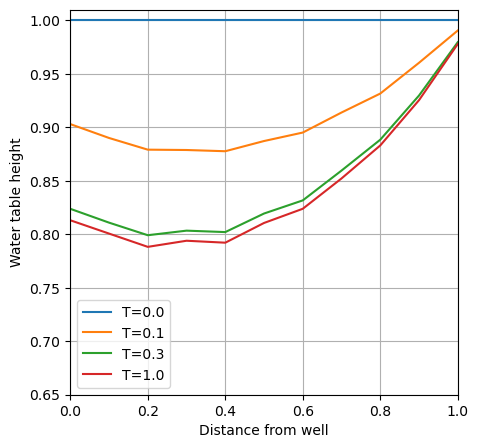

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))


ax.set_ylim(0.65, 1.01)
ax.set_xlim(0, 1)

ax.plot( boundary_grid.face_centers[0],  sol[0][-dof_eta:] )
ax.plot( boundary_grid.face_centers[0],  sol[1][-dof_eta:] )
ax.plot( boundary_grid.face_centers[0],  sol[3][-dof_eta:] )
ax.plot( boundary_grid.face_centers[0], sol[-1][-dof_eta:] )

ax.set_xlabel('Distance from well')
ax.set_ylabel('Water table height')

ax.legend(['T=0.0', 'T=0.1', 'T=0.3', 'T=1.0'])

ax.grid()